In [44]:
# Implement the Continuous Bag of Words (CBOW) Model

In [45]:
import numpy as np
import re

In [46]:
data = """DL is subset of ML.ML is subset of AI.AI means simulation of human intelligence into machines so that they can act and behave like humans. """

In [47]:
data

'DL is subset of ML.ML is subset of AI.AI means simulation of human intelligence into machines so that they can act and behave like humans. '

In [48]:
sentences = data.split('.')
sentences

['DL is subset of ML',
 'ML is subset of AI',
 'AI means simulation of human intelligence into machines so that they can act and behave like humans',
 ' ']

In [49]:
clean_sent = []

for sentence in sentences:
    if sentence == "":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^|)\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

clean_sent

['dl is subset of ml',
 'ml is subset of ai',
 'ai means simulation of human intelligence into machines so that they can act and behave like humans',
 '']

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [51]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)

sequences

[[6, 2, 3, 1, 4],
 [4, 2, 3, 1, 5],
 [5, 7, 8, 1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 []]

In [52]:
index_to_word = {}
word_to_index = {}

for i, sequence in enumerate(sequences):
    word_in_sentence = clean_sent[i].split()
    
    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

print(index_to_word, "\n")
print(word_to_index)

{6: 'dl', 2: 'is', 3: 'subset', 1: 'of', 4: 'ml', 5: 'ai', 7: 'means', 8: 'simulation', 9: 'human', 10: 'intelligence', 11: 'into', 12: 'machines', 13: 'so', 14: 'that', 15: 'they', 16: 'can', 17: 'act', 18: 'and', 19: 'behave', 20: 'like', 21: 'humans'} 

{'dl': 6, 'is': 2, 'subset': 3, 'of': 1, 'ml': 4, 'ai': 5, 'means': 7, 'simulation': 8, 'human': 9, 'intelligence': 10, 'into': 11, 'machines': 12, 'so': 13, 'that': 14, 'they': 15, 'can': 16, 'act': 17, 'and': 18, 'behave': 19, 'like': 20, 'humans': 21}


In [53]:
vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i-2], sequence[i-1], sequence[i+1], sequence[i+2]]
        contexts.append(context)
        targets.append(target)


print(contexts, '\n')
print(targets)

[[6, 2, 1, 4], [4, 2, 1, 5], [5, 7, 1, 9], [7, 8, 9, 10], [8, 1, 10, 11], [1, 9, 11, 12], [9, 10, 12, 13], [10, 11, 13, 14], [11, 12, 14, 15], [12, 13, 15, 16], [13, 14, 16, 17], [14, 15, 17, 18], [15, 16, 18, 19], [16, 17, 19, 20], [17, 18, 20, 21]] 

[3, 3, 8, 1, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [54]:
for i in range(10):
    word = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        word.append(index_to_word.get(j))
    print(word, " -> ", target)

['dl', 'is', 'of', 'ml']  ->  subset
['ml', 'is', 'of', 'ai']  ->  subset
['ai', 'means', 'of', 'human']  ->  simulation
['means', 'simulation', 'human', 'intelligence']  ->  of
['simulation', 'of', 'intelligence', 'into']  ->  human
['of', 'human', 'into', 'machines']  ->  intelligence
['human', 'intelligence', 'machines', 'so']  ->  into
['intelligence', 'into', 'so', 'that']  ->  machines
['into', 'machines', 'that', 'they']  ->  so
['machines', 'so', 'they', 'can']  ->  that


In [55]:
x = np.array(contexts)
y = np.array(targets)

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda

In [57]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda(lambda x : tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [58]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
history = model.fit(x, y, epochs=80)

Epoch 1/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/step - accuracy: 0.0667 - loss: 3.0907
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3333 - loss: 3.0829
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2667 - loss: 3.0761
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2667 - loss: 3.0689
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2667 - loss: 3.0606
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2667 - loss: 3.0510
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2667 - loss: 3.0400
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2667 - loss: 3.0276
Epoch 9/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2667 - loss: 3.0134
Epoch 10/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2667 - loss: 2.9972
Epoch 11/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2667 - loss: 2.9789
Epoch 12/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.2667 - loss: 2.9582


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.1744
Epoch 71/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.1568
Epoch 72/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.1410
Epoch 73/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.1267
Epoch 74/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.1139
Epoch 75/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.1025
Epoch 76/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0923
Epoch 77/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0833
Epoch 78/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0753
Epoch 79/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0681
Epoch 80/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0618


<Axes: >

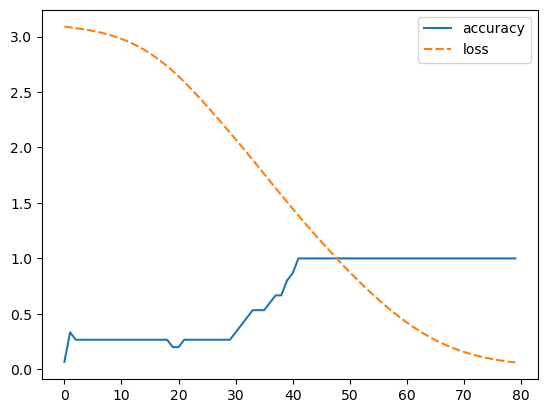

In [60]:
import seaborn as sns
sns.lineplot(model.history.history)

In [61]:
from sklearn.decomposition import PCA

embeddings = model.get_weights()[0]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

In [62]:
data

'DL is subset of ML.ML is subset of AI.AI means simulation of human intelligence into machines so that they can act and behave like humans. '

In [63]:
test_sentenses = [
    "dl is of ml",
    "simulation of human into machines"
]

In [64]:
for sent in test_sentenses:
    test_words = sent.split(" ")

    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])
    
    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
pred  ['dl', 'is', 'of', 'ml'] 
= subset 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
pred  ['simulation', 'of', 'human', 'into', 'machines'] 
= intelligence 


